In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',header=None, names=['column_index','column_name']) # \s는 공백을 의미

In [7]:
feature_name = feature_name_df.iloc[:,1].values.tolist()

In [8]:
feature_name

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [15]:
dup = feature_name_df.groupby('column_name').count()

In [18]:
dup[dup['column_index']>1].head(3)

,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3


In [32]:
def get_new_feature_name_df(old):
    dup = pd.DataFrame(data=old.groupby('column_name').cumcount(),columns=['dup_cnt'])
    dup = dup.reset_index()
    new = pd.merge(old.reset_index(),dup, how='outer')
    new['column_name'] = new[['column_name', 'dup_cnt']].apply(lambda x:x[0]+'_'+str(x[1]) if x[1]>0 else x[0] , axis=1) #행단위로 하기위해 axis=1 해줌
    new.drop(columns=['index'], inplace=True)
    return new

In [33]:
result = get_new_feature_name_df(feature_name_df)
result[result['dup_cnt']>0]

,column_index,column_name,dup_cnt
316,317,"fBodyAcc-bandsEnergy()-1,8_1",1
317,318,"fBodyAcc-bandsEnergy()-9,16_1",1
318,319,"fBodyAcc-bandsEnergy()-17,24_1",1
319,320,"fBodyAcc-bandsEnergy()-25,32_1",1
320,321,"fBodyAcc-bandsEnergy()-33,40_1",1
...,...,...,...
497,498,"fBodyGyro-bandsEnergy()-17,32_2",2
498,499,"fBodyGyro-bandsEnergy()-33,48_2",2
499,500,"fBodyGyro-bandsEnergy()-49,64_2",2
500,501,"fBodyGyro-bandsEnergy()-1,24_2",2


In [34]:
def get_human_dataset():
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',header=None, names=['column_index','column_name'])
    new_name = get_new_feature_name_df(feature_name_df)
    feature_name = new_name.iloc[:,1].values.tolist()
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name)
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+', names=['action'])
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+', names=['action'])
    
    return X_train, X_test, y_train, y_test

In [35]:
X_train, X_test, y_train, y_test =get_human_dataset()

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [39]:
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [41]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy_score(y_test,pred)

0.8547675602307431

In [42]:
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 156,
 'splitter': 'best'}

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
params = {
    'max_depth':[6,8,10,12,16,20,24],
    'min_samples_split':[16]
}
grid_cv = GridSearchCV(dt_clf, params, scoring='accuracy',cv=5,verbose=1) # verbose 디버그 진행상황을 보여줌
grid_cv.fit(X_train,y_train)
print(grid_cv.best_score_)
print(grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
0.8548794147162603
{'max_depth': 8, 'min_samples_split': 16}


In [45]:
pred = grid_cv.best_estimator_.predict(X_test)
accuracy_score(y_test,pred)

0.8717339667458432

In [46]:
im = grid_cv.best_estimator_.feature_importances_

In [53]:
top10 = pd.Series(im,index=X_train.columns).sort_values(ascending=False)[:10]
top10

tGravityAcc-min()-X                0.253354
fBodyAccJerk-bandsEnergy()-1,16    0.212584
angle(Y,gravityMean)               0.139001
fBodyAccMag-energy()               0.115478
tGravityAcc-arCoeff()-Z,2          0.101885
fBodyGyro-maxInds-X                0.023971
tGravityAcc-energy()-Y             0.020470
tBodyGyro-correlation()-Y,Z        0.016513
tGravityAccMag-arCoeff()1          0.015741
tBodyAcc-correlation()-X,Y         0.009972
dtype: float64

<AxesSubplot:>

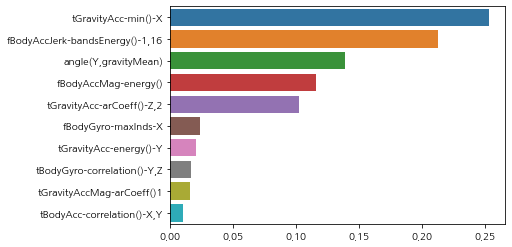

In [54]:
import seaborn as sns
sns.barplot(x=top10,y=top10.index)